In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np

# Load both datasets
house = pd.read_csv("Housing .csv")
socal = pd.read_csv("socal2.csv")

# --- keep only needed columns from socal2
socal = socal[["citi", "street"]]

# --- if socal2 has fewer rows, sample with replacement to match house rows
socal_resampled = socal.sample(n=len(house), replace=True, random_state=42).reset_index(drop=True)

# --- reset index of house to align rows
house = house.reset_index(drop=True)

# --- combine Housing + selected socal2 columns
house = pd.concat([house, socal_resampled], axis=1)

print(house.head())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  \
0              no             yes        2      yes        furnished   
1              no             yes        3       no        furnished   
2              no              no        2      yes   semi-furnished   
3              no             yes        3      yes        furnished   
4              no             yes        2       no        furnished   

                  citi                street  
0      Palm Desert, CA  74397 Zeppelin Drive 

In [3]:
house.tail()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,citi,street
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,"San Diego, CA",938 Opal St
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,"Big Bear, CA",324 MEADOW Circle
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,"Palmdale, CA",38545 E 36th Street
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,"Garden Grove, CA",11751 Samuel Drive
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished,"Escondido, CA",8975 Lawrence Welk Drive


In [4]:
house.describe()


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
house.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
 13  citi              545 non-null    object
 14  street            545 non-null    object
dtypes: int64(6), object(9)
memory usage: 64.0+ KB


In [6]:
# required column keep and other delete from data set
house = house.drop(['stories', 'guestroom','hotwaterheating', 'airconditioning','prefarea','furnishingstatus'], axis=1)


In [7]:
# Convert 'yes' to 1, 'no' to 0 for mainroad and basement
house['mainroad'] = house['mainroad'].map({'yes': 1, 'no': 0})
house['basement'] = house['basement'].map({'yes': 1, 'no': 0})

# Check
print(house[['mainroad', 'basement']].head())

   mainroad  basement
0         1         0
1         1         0
2         1         1
3         1         1
4         1         1


In [8]:
house.isnull().sum().sum()


np.int64(0)

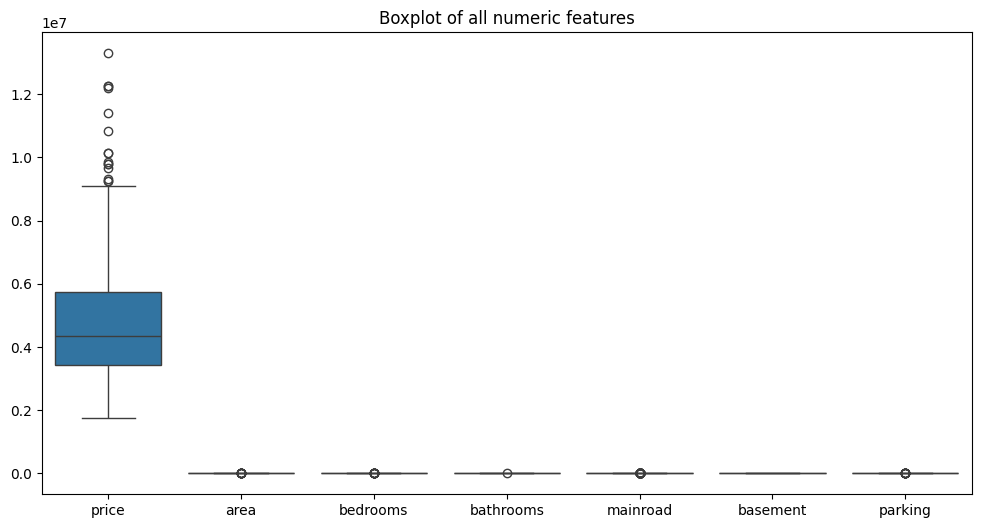

In [9]:
plt.figure(figsize=(12,6))
sns.boxplot(data=house)
plt.title("Boxplot of all numeric features")
plt.show()

In [10]:
house.head()

,price,area,bedrooms,bathrooms,mainroad,basement,parking,citi,street
0,13300000,7420,4,2,1,0,2,"Palm Desert, CA",74397 Zeppelin Drive
1,12250000,8960,4,4,1,0,3,"Lancaster, CA",43929 E 5th Street
2,12250000,9960,3,2,1,1,2,"Coachella, CA",52260 Calle Empalme
3,12215000,7500,4,2,1,1,3,"San Luis Obispo, CA",921 Isabella Way
4,11410000,7420,4,1,1,1,2,"Palm Springs, CA",343 Baristo Road


In [11]:
# from above step we understan the dataset and their is no null value
# data tha data is redy to train for using algorithm

In [12]:
X = house.drop('price', axis=1)
y = house['price']

In [13]:
house

,price,area,bedrooms,bathrooms,mainroad,basement,parking,citi,street
0,13300000,7420,4,2,1,0,2,"Palm Desert, CA",74397 Zeppelin Drive
1,12250000,8960,4,4,1,0,3,"Lancaster, CA",43929 E 5th Street
2,12250000,9960,3,2,1,1,2,"Coachella, CA",52260 Calle Empalme
3,12215000,7500,4,2,1,1,3,"San Luis Obispo, CA",921 Isabella Way
4,11410000,7420,4,1,1,1,2,"Palm Springs, CA",343 Baristo Road
...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,2,"San Diego, CA",938 Opal St
541,1767150,2400,3,1,0,0,0,"Big Bear, CA",324 MEADOW Circle
542,1750000,3620,2,1,1,0,0,"Palmdale, CA",38545 E 36th Street
543,1750000,2910,3,1,0,0,0,"Garden Grove, CA",11751 Samuel Drive


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical columns
categorical_features = ['citi', 'street']
numerical_features = X.select_dtypes(include=np.number).columns.tolist()

# Create a column transformer for one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Keep numerical features
)

# Apply the preprocessor to X
X_processed = preprocessor.fit_transform(X)

# Split the processed data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [15]:
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

print("MLR R2:", r2_score(y_test, y_pred))
print("MLR RMSE:", mean_squared_error(y_test, y_pred))

MLR R2: 0.3826626117782166
MLR RMSE: 3120375194471.254


In [16]:
from sklearn.tree import DecisionTreeRegressor

# Create model
dt = DecisionTreeRegressor(random_state=42)

# Train model
dt.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [17]:
y_pred_dt = dt.predict(X_test)


In [18]:
y_pred_dt

array([ 6160000.,  5950000.,  3290000.,  5810000.,  3500000.,  4270000.,
        4830000.,  5285000.,  2835000.,  2940000., 10150000.,  3395000.,
        2940000.,  3640000.,  3500000.,  4200000.,  3850000.,  6629000.,
        6650000.,  4270000.,  5810000.,  5040000.,  4515000.,  3500000.,
        5229000.,  5250000.,  3360000.,  5460000.,  7000000.,  3780000.,
        4200000.,  4473000.,  7560000.,  4270000.,  2485000.,  5285000.,
        4900000.,  4007500.,  2940000.,  4200000.,  4830000.,  3395000.,
        7840000.,  4060000.,  4270000.,  3500000.,  7560000.,  4130000.,
        4515000.,  4620000.,  8575000.,  3780000.,  5145000.,  4900000.,
        4007500.,  2940000.,  6195000.,  3430000.,  4270000.,  2660000.,
        3150000.,  3773000.,  4200000.,  4550000.,  4025000.,  3535000.,
        5390000.,  4200000.,  4200000.,  4130000.,  5460000.,  4270000.,
        5145000.,  5600000.,  3780000.,  4200000.,  3500000.,  3360000.,
        6629000.,  2975000.,  7700000.,  4060000., 

In [19]:
print("Decision Tree R2:", r2_score(y_test, y_pred_dt))
print("Decision Tree MSE:", mean_squared_error(y_test, y_pred_dt))

Decision Tree R2: 0.42665087845250493
Decision Tree MSE: 2898033410550.4585


In [20]:
print("Model Comparison:")
print(f"Linear Regression → R2: {r2_score(y_test, y_pred):.3f}, MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Decision Tree    → R2: {r2_score(y_test, y_pred_dt):.3f}, MSE: {mean_squared_error(y_test, y_pred_dt):.2f}")

Model Comparison:
Linear Regression → R2: 0.383, MSE: 3120375194471.25
Decision Tree    → R2: 0.427, MSE: 2898033410550.46


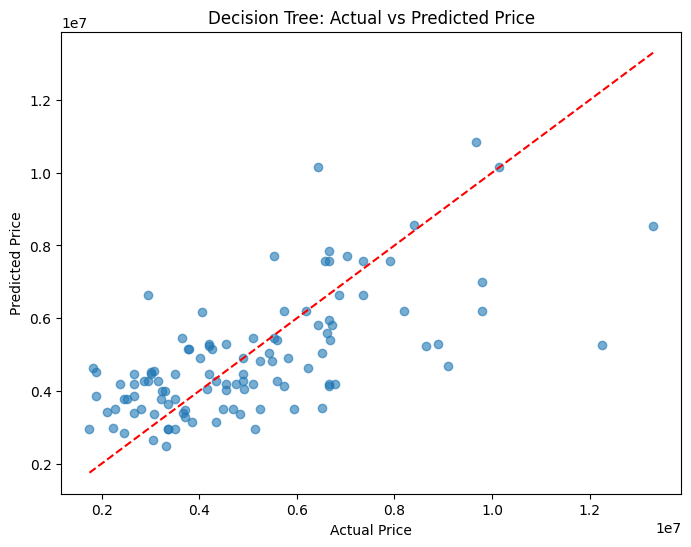

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_dt, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Decision Tree: Actual vs Predicted Price")
plt.show()

In [22]:
house

,price,area,bedrooms,bathrooms,mainroad,basement,parking,citi,street
0,13300000,7420,4,2,1,0,2,"Palm Desert, CA",74397 Zeppelin Drive
1,12250000,8960,4,4,1,0,3,"Lancaster, CA",43929 E 5th Street
2,12250000,9960,3,2,1,1,2,"Coachella, CA",52260 Calle Empalme
3,12215000,7500,4,2,1,1,3,"San Luis Obispo, CA",921 Isabella Way
4,11410000,7420,4,1,1,1,2,"Palm Springs, CA",343 Baristo Road
...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,2,"San Diego, CA",938 Opal St
541,1767150,2400,3,1,0,0,0,"Big Bear, CA",324 MEADOW Circle
542,1750000,3620,2,1,1,0,0,"Palmdale, CA",38545 E 36th Street
543,1750000,2910,3,1,0,0,0,"Garden Grove, CA",11751 Samuel Drive


In [23]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2906 stored elements and shape (436, 727)>

In [24]:
import joblib



In [25]:
import joblib

# List of features used in training
feature_columns = ['area', 'bedrooms', 'bathrooms', 'mainroad', 'basement', 'parking', 'citi', 'street']

# Take user input
num_houses = int(input("How many houses do you want to predict? "))
user_inputs = []

for i in range(num_houses):
    print(f"\nEnter details for House {i+1}:")
    area = float(input("Area (sqft): "))
    bedrooms = int(input("Bedrooms: "))
    bathrooms = int(input("Bathrooms: "))
    mainroad = int(input("Mainroad? (yes=1 / no=0): "))
    basement = int(input("Basement? (yes=1 / no=0): "))
    parking = int(input("Parking: "))
    citi = input("City: ")
    street = input("Street: ")


    user_inputs.append({
        'area': area,
        'bedrooms': bedrooms,
        'bathrooms': bathrooms,
        'mainroad': mainroad,
        'basement': basement,
        'parking': parking,
        'citi': citi,
        'street': street
    })

# Convert to DataFrame
user_df = pd.DataFrame(user_inputs)

# Ensure column order matches training
user_df = user_df[feature_columns]

# Apply the same preprocessor used during training
user_df_processed = preprocessor.transform(user_df)

# Predict
predicted_prices = dt.predict(user_df_processed)

# Show results
for i, price in enumerate(predicted_prices):
    print(f"\nPredicted price for House {i+1}: ₹ {price:,.0f}")

How many houses do you want to predict? 2

Enter details for House 1:
Area (sqft): 2000
Bedrooms: 2
Bathrooms: 2
Mainroad? (yes=1 / no=0): 0
Basement? (yes=1 / no=0): 1
Parking: 1
City: san fransisco
Street: 818

Enter details for House 2:
Area (sqft): 1500
Bedrooms: 4
Bathrooms: 6
Mainroad? (yes=1 / no=0): 1
Basement? (yes=1 / no=0): 1
Parking: 4
City: new york
Street: 546

Predicted price for House 1: ₹ 3,150,000

Predicted price for House 2: ₹ 3,773,000


In [26]:
import joblib

# Save the trained Decision Tree model
joblib.dump(dt, 'model.joblib')
# ALSO SAVE THE PREPROCESSOR!
joblib.dump(preprocessor, 'preprocessor.joblib')
print("Model saved successfully!")

Model saved successfully!


In [27]:
import joblib
import pandas as pd

# Assume 'X_encoded' is the name of your DataFrame after you used pd.get_dummies()
# If you used a different name, replace 'X_encoded' below.

# --- This is the crucial part ---

# 1. Get the list of all column names in the correct order
model_column_list = preprocessor.get_feature_names_out()

# 2. Save that list to a file named 'model_columns.joblib'
joblib.dump(model_column_list, 'model_columns.joblib')

print("Successfully created 'model_columns.joblib'!")
print("\nYour model was trained on these columns:")
print(model_column_list)

Successfully created 'model_columns.joblib'!

Your model was trained on these columns:
['onehot__citi_Acton, CA' 'onehot__citi_Adelanto, CA'
 'onehot__citi_Agoura Hills, CA' 'onehot__citi_Alhambra, CA'
 'onehot__citi_Alta Loma, CA' 'onehot__citi_Anaheim, CA'
 'onehot__citi_Apple Valley, CA' 'onehot__citi_Arcadia, CA'
 'onehot__citi_Arleta, CA' 'onehot__citi_Arroyo Grande, CA'
 'onehot__citi_Atascadero, CA' 'onehot__citi_Avila Beach, CA'
 'onehot__citi_Bakersfield, CA' 'onehot__citi_Baldwin Park, CA'
 'onehot__citi_Banning, CA' 'onehot__citi_Belltown, CA'
 'onehot__citi_Big Bear, CA' 'onehot__citi_Borrego Springs, CA'
 'onehot__citi_Brea, CA' 'onehot__citi_Buena Park, CA'
 'onehot__citi_Caliente, CA' 'onehot__citi_Camarillo, CA'
 'onehot__citi_Cambria, CA' 'onehot__citi_Canoga Park, CA'
 'onehot__citi_Canyon Country, CA' 'onehot__citi_Carlsbad, CA'
 'onehot__citi_Cathedral City, CA' 'onehot__citi_Cayucos, CA'
 'onehot__citi_Cedarpines Park, CA' 'onehot__citi_Chatsworth, CA'
 'onehot__ci